In [106]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


#Visualizations library
import seaborn as sns 
import matplotlib.pyplot as plt


#Stats library
from scipy import stats
from scipy.stats import norm, skew 

#Preprocessing Libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from scipy.special import boxcox1p


# Modellling Librries
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LassoCV, Ridge
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import GridSearchCV 

import xgboost as xgb

import os
# print(os.listdir("../House Price Predictor"))

# Any results you write to the current directory are saved as output.

In [107]:
train = pd.read_csv('../input/blackfriday-train/train.csv')
test = pd.read_csv('../input/blackfriday-test/test.csv')


id_train = train.index
id_test = test.index

In [108]:
train.shape

(550068, 12)

In [109]:
train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [110]:
train.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [111]:
train.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [112]:
test.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [113]:
test.nunique()

User_ID                       5891
Product_ID                    3491
Gender                           2
Age                              7
Occupation                      21
City_Category                    3
Stay_In_Current_City_Years       5
Marital_Status                   2
Product_Category_1              18
Product_Category_2              17
Product_Category_3              15
dtype: int64

In [114]:
train.index

RangeIndex(start=0, stop=550068, step=1)

In [115]:
test.index

RangeIndex(start=0, stop=233599, step=1)

In [116]:
pr_Id = test.Product_ID

In [117]:
purchase = train.Purchase

In [118]:
meanPrice = train.groupby('Product_ID')['Purchase'].mean()

In [119]:
meanPrice = meanPrice.rename('MeanPurchase')

In [120]:
meanPrice.head()

Product_ID
P00000142    11143.642361
P00000242    10551.851064
P00000342     5313.422131
P00000442     4795.358696
P00000542     5417.530201
Name: MeanPurchase, dtype: float64

In [121]:
combine = pd.concat([train, test], sort=True, ignore_index=True)
combine.drop('Purchase', axis=1, inplace=True)

In [122]:
combine.index

RangeIndex(start=0, stop=783667, step=1)

In [123]:
# Dataframe that shows Null count and percent odf null counts of all features.
def checkNull(dataFrame):
    nullCount = dataFrame.isnull().sum().sort_values(ascending=False)
    nullCount = nullCount[nullCount != 0]
    nullPercent = ((nullCount)/combine.shape[0]) * 100
    nullCols = pd.DataFrame([nullCount, nullPercent], index=['Count', 'Percent']).transpose()
    return nullCols

In [124]:
nullCols = checkNull(combine)
nullCols.head(10)

,Count,Percent
Product_Category_3,545809.0,69.648078
Product_Category_2,245982.0,31.388587


In [125]:
combine.fillna(-999, inplace=True)

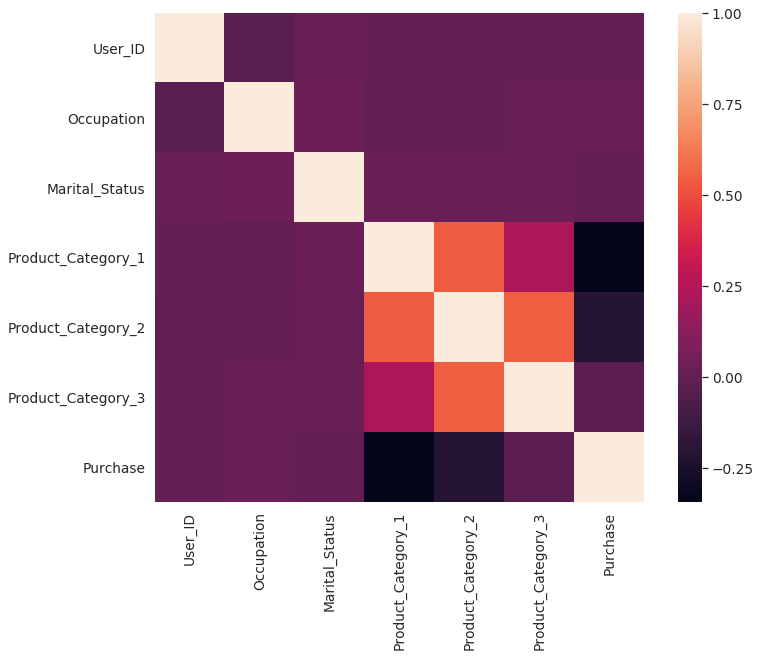

In [126]:
# Visualising Correlation

corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, square=True)

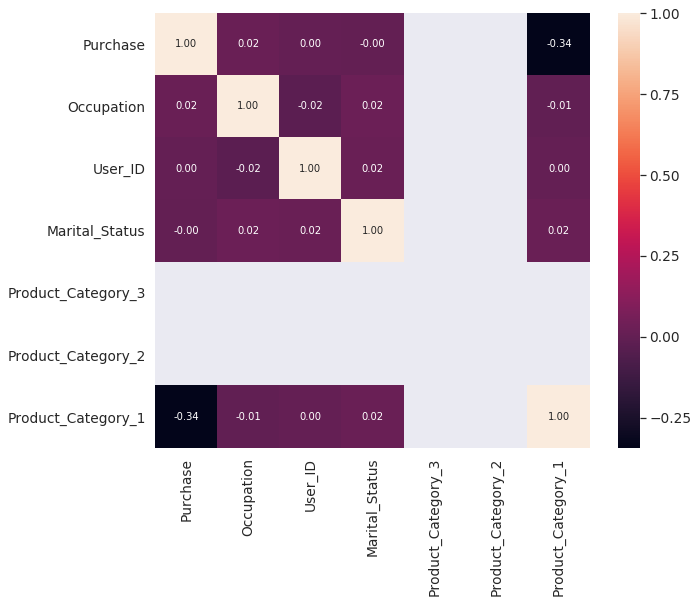

In [127]:
k = 12
selectedCols = corrmat.nlargest(k, 'Purchase')['Purchase'].index
cm = np.corrcoef(train[selectedCols].values.T)
f, ax = plt.subplots(figsize=(10, 8))

sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size' : 10}, yticklabels=selectedCols.values, xticklabels=selectedCols.values)
plt.show()

In [128]:
# train.Product_ID.value_counts().idxmax()

In [129]:
# train.Product_ID.value_counts().idxmin()

In [130]:
# maxPuchasedProduct = train[train.Product_ID == 'P00265242']

In [131]:
# maxPuchasedProduct

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
399,1000066,P00265242,M,26-35,18,C,2,0,5,8.0,NaN,8652
1191,1000196,P00265242,F,36-45,9,C,4+,0,5,8.0,NaN,8767
1372,1000222,P00265242,M,26-35,1,A,1,0,5,8.0,NaN,6944
1845,1000301,P00265242,M,18-25,4,B,4+,0,5,8.0,NaN,8628
2209,1000345,P00265242,M,26-35,12,A,2,1,5,8.0,NaN,8593
2404,1000383,P00265242,F,26-35,7,A,4+,1,5,8.0,NaN,6998
2466,1000398,P00265242,M,26-35,17,B,3,1,5,8.0,NaN,8646
2682,1000426,P00265242,M,18-25,4,A,1,1,5,8.0,NaN,8890
2851,1000459,P00265242,F,18-25,4,A,3,0,5,8.0,NaN,8770
3148,1000518,P00265242,F,36-45,12,C,4+,0,5,8.0,NaN,8896


In [132]:
# # Visualising Correlation

# corrmat = maxPuchasedProduct.corr()
# f, ax = plt.subplots(figsize=(12, 9))

# sns.heatmap(corrmat, square=True)

In [133]:
# k = 12
# selectedCols = corrmat.nlargest(k, 'Purchase')['Purchase'].index
# cm = np.corrcoef(maxPuchasedProduct[selectedCols].values.T)
# f, ax = plt.subplots(figsize=(10, 8))

# sns.set(font_scale=1.25)
# hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size' : 10}, yticklabels=selectedCols.values, xticklabels=selectedCols.values)
# plt.show()

In [134]:
lowerAgeDix = {'0-17': 0, '18-25': 18, '26-35': 26, '36-45': 36, '46-50': 46, '51-55': 51, '55+': 55 }

In [135]:
upperAgeDix = {'0-17': 17, '18-25': 25, '26-35': 35, '36-45': 45, '46-50': 50, '51-55': 55, '55+': 75 }

In [136]:
combine['Lower_Age'] = combine['Age'].map(lowerAgeDix)

In [137]:
combine['Upper_Age'] = combine['Age'].map(upperAgeDix)

In [138]:
combine.Stay_In_Current_City_Years = combine.Stay_In_Current_City_Years.replace('4+', 4)

In [139]:
combine = combine.join(meanPrice, on='Product_ID')

In [140]:
combine.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Stay_In_Current_City_Years,User_ID,Lower_Age,Upper_Age,MeanPurchase
0,0-17,A,F,0,10,3,-999.0,-999.0,P00069042,2,1000001,0,17,11870.863436
1,0-17,A,F,0,10,1,6.0,14.0,P00248942,2,1000001,0,17,16304.030981
2,0-17,A,F,0,10,12,-999.0,-999.0,P00087842,2,1000001,0,17,1237.892157
3,0-17,A,F,0,10,12,14.0,-999.0,P00085442,2,1000001,0,17,1455.140762
4,55+,C,M,0,16,8,-999.0,-999.0,P00285442,4,1000002,55,75,7692.763547


In [141]:
combine.Occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6])

In [142]:
combine.dtypes

Age                            object
City_Category                  object
Gender                         object
Marital_Status                  int64
Occupation                      int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Product_ID                     object
Stay_In_Current_City_Years     object
User_ID                         int64
Lower_Age                       int64
Upper_Age                       int64
MeanPurchase                  float64
dtype: object

In [143]:
combine = pd.get_dummies(combine, columns=['City_Category', 'Gender', 'Marital_Status', 'Stay_In_Current_City_Years'])

In [144]:
combine['Product_ID'] = combine['Product_ID'].str[1:]

In [145]:
combine.index.nunique()

783667

In [146]:
combine['Product_ID'] = combine['Product_ID'].astype('int64')
combine['Product_Category_2'] = combine['Product_Category_2'].astype('int64')
combine['Product_Category_3'] = combine['Product_Category_3'].astype('int64')

In [147]:
le = LabelEncoder()

In [148]:
combine['Age'] = le.fit_transform(combine.Age)

In [149]:
combine.dtypes

Age                               int64
Occupation                        int64
Product_Category_1                int64
Product_Category_2                int64
Product_Category_3                int64
Product_ID                        int64
User_ID                           int64
Lower_Age                         int64
Upper_Age                         int64
MeanPurchase                    float64
City_Category_A                   uint8
City_Category_B                   uint8
City_Category_C                   uint8
Gender_F                          uint8
Gender_M                          uint8
Marital_Status_0                  uint8
Marital_Status_1                  uint8
Stay_In_Current_City_Years_4      uint8
Stay_In_Current_City_Years_0      uint8
Stay_In_Current_City_Years_1      uint8
Stay_In_Current_City_Years_2      uint8
Stay_In_Current_City_Years_3      uint8
dtype: object

In [150]:
combine.Product_Category_2.unique()

array([-999,    6,   14,    2,    8,   15,   16,   11,    5,    3,    4,
         12,    9,   10,   17,   13,    7,   18])

In [151]:
train = combine[combine.index < 550068].copy()
test = combine[combine.index >= 550068].copy()

In [152]:
combine.index

RangeIndex(start=0, stop=783667, step=1)

In [153]:
train.shape

(550068, 22)

In [154]:
train.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            550058, 550059, 550060, 550061, 550062, 550063, 550064, 550065,
            550066, 550067],
           dtype='int64', length=550068)

In [155]:
purchase.shape

(550068,)

In [156]:
test.shape

(233599, 22)

In [157]:
test.index = range(233599)

In [158]:
test.index

RangeIndex(start=0, stop=233599, step=1)

In [159]:
x_train, cv, y_train, y_cv = train_test_split(train, purchase, test_size=0.25, random_state=42)

In [160]:
x_train.index

Int64Index([212363,  41298, 470717, 394764, 265659, 111363,  98061, 146374,
            348055, 482833,
            ...
            175203,  87498, 521430, 137337,  54886, 110268, 259178, 365838,
            131932, 121958],
           dtype='int64', length=412551)

In [161]:
y_train.index

Int64Index([212363,  41298, 470717, 394764, 265659, 111363,  98061, 146374,
            348055, 482833,
            ...
            175203,  87498, 521430, 137337,  54886, 110268, 259178, 365838,
            131932, 121958],
           dtype='int64', length=412551)

In [162]:
# ENet = make_pipeline(RobustScaler(), GridSearchCV(ElasticNet(), param_grid={'alpha': [0.01, 0.03, 0.06, 0.1, 0.3, 0.5, 1, 5, 10, 15, 30],
#                                                                'l1_ratio': [0.001, 0.1, 0.3, 0.5, 0.7, 0.9], 'random_state': [3]}
#                                                 )
#                     )

In [163]:
model = xgb.XGBRegressor()

In [164]:
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [165]:
def rmse_cv(model, X, y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5))
    return rmse

In [166]:
print("score: ", (rmse_cv(model, cv, y_cv)).mean())

score:  2644.535215542934


In [167]:
y_predict = model.predict(test)

In [168]:
submission = pd.DataFrame({
    'User_ID': test.User_ID,
    'Product_ID': pr_Id,
    'Purchase': y_predict
})

In [169]:
submission.to_csv('submissionBF_meanPur.csv', index=False)

In [170]:
# ENet.fit(x_train, y_train)

In [171]:
# y_predict = ENet.predict(test)